In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import shuffle
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
#!pip install scikit-plot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import scikitplot as skplt
import time
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle


In [0]:
dataset1 = pd.read_csv('final_dataset.csv')

In [0]:
X=[]
y=[]
X = dataset1.iloc[:,:-2].to_numpy()
y = dataset1.iloc[:,-2].to_numpy()

In [0]:
def plot_roc(y_pred_val, y_testlb_val, y_predlb_val, classifier,count):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(np.unique(y_pred_val))):
    fpr[i], tpr[i], _ = roc_curve(y_testlb_val[:, i], y_predlb_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  n_classes = len(np.unique(y_pred_val))
  print('n_classes',n_classes)
  print('fpr[i] ',fpr[i])
  print('tpr[i] ',tpr[i])
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    # Plot all ROC curves
  plt.figure()
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
               label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristics '+classifier)
  plt.legend(loc="lower right")
  plt.savefig('ROC '+classifier+' '+str(count)+'.png')
  plt.show()
  plt.clf()

TRAIN: [     0      1      3 ... 536761 536762 536763] 
 TEST: [     2     12     14 ... 536749 536751 536757] 

Y_train: [0 1 2 3 4 5 6 7 8 9] 

Y_test unique:  [0 1 2 3 4 5 6 7 8 9] 

ypred unique 
 [0 1 2 3 4 5 6 8 9] 

shape pred 
 (107353, 9) 

shape test 
 (107353, 10) 

ROC SCORE:
 0.5065448342398647 

F1 SCORE:
 0.4141849785287789 

n_classes 9
fpr[i]  [0.00000000e+00 1.21622633e-04 1.00000000e+00]
tpr[i]  [0. 0. 1.]


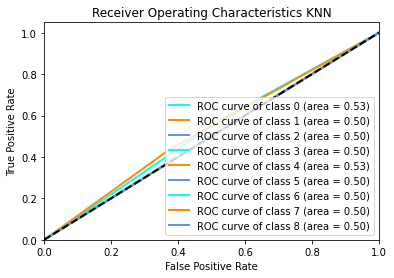

TRAIN: [     1      2      3 ... 536761 536762 536763] 
 TEST: [     0      5      8 ... 536756 536758 536760] 

Y_train: [0 1 2 3 4 5 6 7 8 9] 

Y_test unique:  [0 1 2 3 4 5 6 7 8 9] 

ypred unique 
 [0 1 2 3 4 5 6 8 9] 

shape pred 
 (107353, 9) 

shape test 
 (107353, 10) 

ROC SCORE:
 0.5064917215667282 

F1 SCORE:
 0.412918129907874 

n_classes 9
fpr[i]  [0.00000000e+00 3.74226987e-05 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

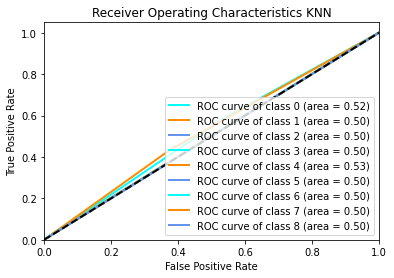

TRAIN: [     0      1      2 ... 536761 536762 536763] 
 TEST: [    13     20     22 ... 536706 536716 536724] 

Y_train: [0 1 2 3 4 5 6 7 8 9] 

Y_test unique:  [0 1 2 3 4 5 6 7 8 9] 

ypred unique 
 [0 1 2 3 4 5 6 8 9] 

shape pred 
 (107353, 9) 

shape test 
 (107353, 10) 

ROC SCORE:
 0.5068019088966467 

F1 SCORE:
 0.4147625124588973 

n_classes 9
fpr[i]  [0.0000000e+00 1.4033512e-04 1.0000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

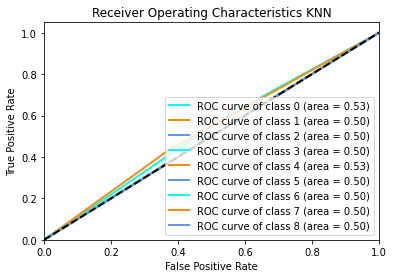

TRAIN: [     0      2      4 ... 536760 536762 536763] 
 TEST: [     1      3      6 ... 536753 536759 536761] 

Y_train: [0 1 2 3 4 5 6 7 8 9] 

Y_test unique:  [0 1 2 3 4 5 6 7 8 9] 

ypred unique 
 [0 1 2 3 4 5 6 8 9] 

shape pred 
 (107353, 9) 

shape test 
 (107353, 10) 

ROC SCORE:
 0.5065808935475057 

F1 SCORE:
 0.4140731977681108 

n_classes 9
fpr[i]  [0.00000000e+00 3.74226987e-05 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

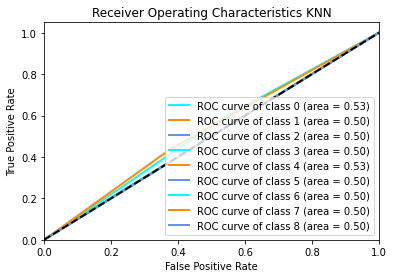

TRAIN: [     0      1      2 ... 536759 536760 536761] 
 TEST: [     4     15     19 ... 536754 536762 536763] 

Y_train: [0 1 2 3 4 5 6 7 8 9] 

Y_test unique:  [0 1 2 3 4 5 6 7 8 9] 

ypred unique 
 [0 1 2 3 4 5 6 7 8 9] 

shape pred 
 (107352, 10) 

shape test 
 (107352, 10) 

ROC SCORE:
 0.505874062393907 

F1 SCORE:
 0.4144217154780535 

n_classes 10
fpr[i]  [0.000000e+00 1.404284e-04 1.000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

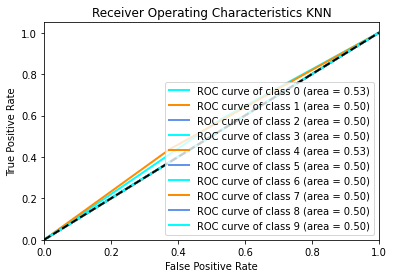

F1 score for KNN model prediction:  
 [0.4141849785287789, 0.412918129907874, 0.4147625124588973, 0.4140731977681108, 0.4144217154780535] 

Avg F1 score 0.41407210682834295 

Accuracy score for KNN prediction:  
 [0.5065448342398647, 0.5064917215667282, 0.5068019088966467, 0.5065808935475057, 0.505874062393907] 

Avg cv score 0.5064586841289305 

Time taken by KNN model:  873.5051422 seconds 



<Figure size 432x288 with 0 Axes>

In [0]:
skf = StratifiedKFold(n_splits=5,shuffle = True)
#   Training Model with KNN and evluate with F1 and ROC metrics:


time_knn =[]
f1_knn = []
roc_knn = []


for train_index, test_index in skf.split(X, y):
    count = 0
    print("TRAIN:", train_index,'\n', "TEST:", test_index,'\n')

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Y_train:",np.unique(y_train),'\n')
    print("Y_test unique: ",np.unique(y_test),'\n')
    s = time.clock()
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train,y_train)

    y_pred = knn_model.predict(X_test)
    print('ypred unique \n',np.unique(y_pred),'\n')
    e = time.clock() - s
    time_knn.append(e)
    lb = preprocessing.LabelBinarizer()
    y_testlb = lb.fit_transform(y_test)
    y_predlb = lb.fit_transform(y_pred)

    print('shape pred \n',y_predlb.shape,'\n')
    print('shape test \n',y_testlb.shape,'\n')

    roc_score = roc_auc_score(y_testlb,y_predlb)
    print('ROC SCORE:\n',roc_score,'\n') 
    roc_knn.append(roc_score)

    f1score = f1_score(y_test, y_pred, average='micro')
    print('F1 SCORE:\n',f1score,'\n')
    f1_knn.append(f1score)

    plot_roc(y_pred, y_testlb, y_predlb, "KNN",count)
    count+=1

f1_nv_avg = np.mean(f1_knn)
roc_nv_avg = np.mean(roc_knn)
print("F1 score for KNN model prediction: ",'\n',f1_knn,'\n')
print("Avg F1 score",f1_nv_avg,'\n')
print("Accuracy score for KNN prediction: ",'\n',roc_knn,'\n')
print("Avg cv score",roc_nv_avg,'\n')
print("Time taken by KNN model: ", (sum(time_knn)/5),"seconds \n")

In [0]:
skf = StratifiedKFold(n_splits=5,shuffle = True)
time_nv =[]
f1_nv = []
roc_nv = []


# Training Model with Navie Bayes and evalauting using F1 and ROC accuracy

for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()
     NB_model = GaussianNB()
     NB_model.fit(X_train,y_train)
     y_pred = NB_model.predict(X_test)

     e = time.clock() - s
     time_nv.append(e) 
     score = f1_score(y_test,y_pred, average='micro')
     f1_nv.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)

     accuracy = roc_auc_score(y_testlb,y_predlb)
     roc_nv.append(accuracy)
    #  plot_roc(y_pred, y_testlb, y_predlb, "Navie Bayes",count)
    #  count+=1


f1_nv_avg = np.mean(f1_nv)
roc_nv_avg = np.mean(roc_nv)
print("F1 score for NB Gaussian model prediction: ",'\n',f1_nv,'\n')
print("Avg F1 score",f1_nv_avg,'\n')
print("Accuracy score for NB Gaussian model prediction: ",'\n',roc_nv,'\n')
print("Avg cv score",roc_nv_avg,'\n')
print("Time taken by NB Gaussian model: ", (sum(time_nv)/5),"seconds \n")

TRAIN: [     0      1      2 ... 536755 536757 536761] TEST: [     4      9     10 ... 536760 536762 536763]
TRAIN: [     0      1      3 ... 536761 536762 536763] TEST: [     2     14     24 ... 536743 536750 536751]
TRAIN: [     1      2      3 ... 536761 536762 536763] TEST: [     0      5     11 ... 536749 536752 536757]
TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [     3      8     18 ... 536744 536745 536753]
TRAIN: [     0      2      3 ... 536760 536762 536763] TEST: [     1      6      7 ... 536754 536755 536761]
F1 score for NB Gaussian model prediction:  
 [0.7102828984751242, 0.7090533101077754, 0.7097892001155068, 0.7081683790858196, 0.709078545346151] 

Avg F1 score 0.7092744666260755 

Accuracy score for NB Gaussian model prediction:  
 [0.19619282700942062, 0.19850896772771442, 0.1976221816324003, 0.19975177974974317, 0.1994879173786569] 

Avg cv score 0.1983127346995871 

Time taken by NB Gaussian model:  0.5840399999993678 seconds 



TRAIN: [     0      1      2 ... 536760 536762 536763] TEST: [     9     16     21 ... 536746 536751 536761]
n_classes 10
fpr[i]  [0.         0.00196598 1.        ]
tpr[i]  [0.        0.1641791 1.       ]


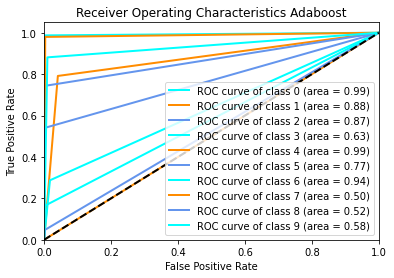

TRAIN: [     0      1      2 ... 536759 536761 536762] TEST: [     5      8     11 ... 536757 536760 536763]
n_classes 10
fpr[i]  [0.         0.00223745 1.        ]
tpr[i]  [0.         0.15327103 1.        ]


<Figure size 432x288 with 0 Axes>

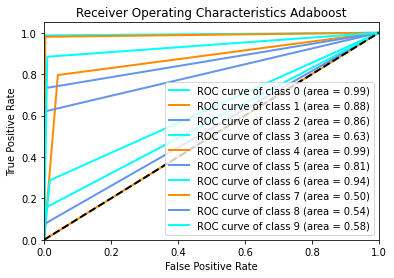

TRAIN: [     0      2      5 ... 536761 536762 536763] TEST: [     1      3      4 ... 536737 536740 536748]
n_classes 10
fpr[i]  [0.        0.0021532 1.       ]
tpr[i]  [0.         0.13831776 1.        ]


<Figure size 432x288 with 0 Axes>

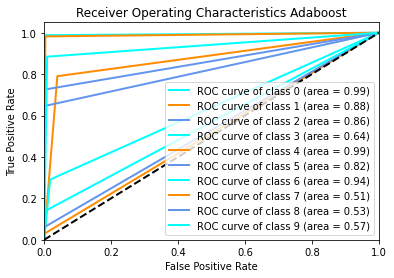

TRAIN: [     1      3      4 ... 536761 536762 536763] TEST: [     0      2     17 ... 536752 536753 536759]
n_classes 10
fpr[i]  [0.         0.00234979 1.        ]
tpr[i]  [0.         0.16261682 1.        ]


<Figure size 432x288 with 0 Axes>

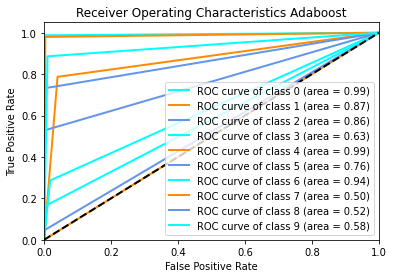

TRAIN: [     0      1      2 ... 536760 536761 536763] TEST: [     6      7     12 ... 536750 536758 536762]
n_classes 10
fpr[i]  [0.         0.00222813 1.        ]
tpr[i]  [0.         0.18097015 1.        ]


<Figure size 432x288 with 0 Axes>

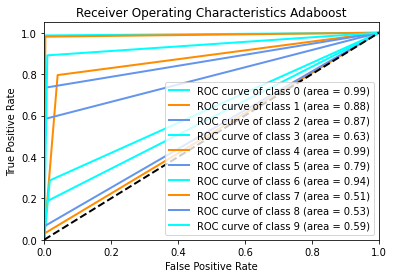

F1 score for Adaboost model prediction:  
 [0.9256937393458963, 0.9263271636563487, 0.9269512729034121, 0.925265246430002, 0.9268853863924287] 

Avg F1 score 0.9262245617456175 

Accuracy score for Adaboost model prediction:  
 [0.7670481008964763, 0.7718313946006019, 0.7728657550672098, 0.7658017857023676, 0.7727740039542162] 

Avg cv score 0.7700642080441743 

Time taken by Adaboost model:  698.6587731999998 seconds 



<Figure size 432x288 with 0 Axes>

In [0]:
# Training Model with Adaboost Classifier and evluate with F1 and ROC metrics:
skf = StratifiedKFold(n_splits=5,shuffle = True)
time_Ada =[]
f1_Ada = []
roc_Ada = []


for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()

     ada_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=4,random_state=21),n_estimators=50)
     ada_model.fit(X_train,y_train)

     y_pred = ada_model.predict(X_test)

     e = time.clock() - s
     time_Ada.append(e) 

     score = f1_score(y_test,y_pred, average='micro')
     f1_Ada.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)

     accuracy = roc_auc_score(y_testlb,y_predlb)
     roc_Ada.append(accuracy)
     plot_roc(y_pred, y_testlb, y_predlb, "Adaboost",count)
     count+=1

f1_Ada_avg = np.mean(f1_Ada)
roc_Ada_avg = np.mean(roc_Ada)
print("F1 score for Adaboost model prediction: ",'\n',f1_Ada,'\n')
print("Avg F1 score",f1_Ada_avg,'\n')
print("Accuracy score for Adaboost model prediction: ",'\n',roc_Ada,'\n')
print("Avg cv score",roc_Ada_avg,'\n')
print("Time taken by Adaboost model: ", (sum(time_Ada)/5),"seconds \n")

TRAIN: [     0      2      3 ... 536761 536762 536763] TEST: [     1     15     18 ... 536754 536755 536759]
n_classes 10
fpr[i]  [0.00000000e+00 5.71070148e-04 1.00000000e+00]
tpr[i]  [0.         0.15298507 1.        ]


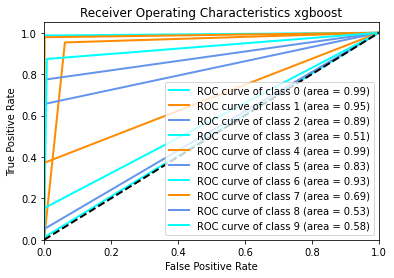

TRAIN: [     0      1      2 ... 536760 536761 536763] TEST: [     4     14     16 ... 536750 536758 536762]
n_classes 10
fpr[i]  [0.00000000e+00 5.99149956e-04 1.00000000e+00]
tpr[i]  [0.         0.14766355 1.        ]


<Figure size 432x288 with 0 Axes>

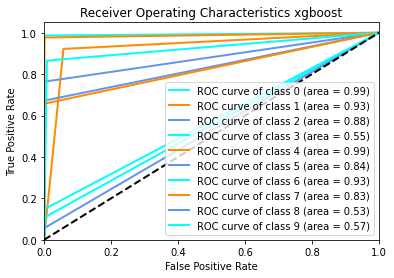

TRAIN: [     0      1      2 ... 536760 536761 536762] TEST: [     3     10     12 ... 536746 536751 536763]
n_classes 10
fpr[i]  [0.00000000e+00 6.17873392e-04 1.00000000e+00]
tpr[i]  [0.         0.13271028 1.        ]


<Figure size 432x288 with 0 Axes>

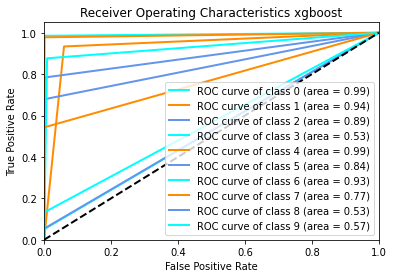

TRAIN: [     0      1      3 ... 536761 536762 536763] TEST: [     2      5      8 ... 536749 536756 536757]
n_classes 10
fpr[i]  [0.0000000e+00 6.2723511e-04 1.0000000e+00]
tpr[i]  [0.         0.12897196 1.        ]


<Figure size 432x288 with 0 Axes>

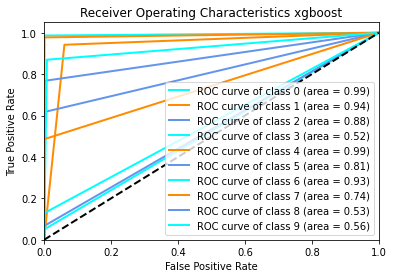

TRAIN: [     1      2      3 ... 536759 536762 536763] TEST: [     0      6      7 ... 536752 536760 536761]
n_classes 10
fpr[i]  [0.00000000e+00 5.14904134e-04 1.00000000e+00]
tpr[i]  [0.         0.13992537 1.        ]


<Figure size 432x288 with 0 Axes>

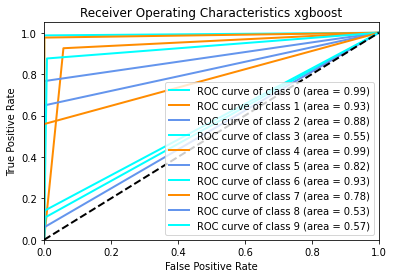

F1 score for xgboost  model prediction:  
 [0.9305934626885136, 0.9300718191387293, 0.9300811342021182, 0.9300997643288963, 0.930788434309561] 

Avg F1 score 0.9303269229335637 



NameError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
# Training Model with xgboost classifier and evluate with F1 and ROC metrics:
skf = StratifiedKFold(n_splits=5,shuffle = True)
time_xgb =[]
f1_xgb = []
roc_xgb = []

for train_index, test_index in skf.split(X, y):
     count +=1
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()

     XGB_model = XGBClassifier(learning_rate =0.1, n_estimators=100, num_class = 12,
                             min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
                             objective= 'multi:softmax', nthread=4,scale_pos_weight=1,
                             seed=27, early_stopping_rounds=70, verbose=False)

     XGB_model.fit(X_train,y_train)

     y_pred = XGB_model.predict(X_test)

     e = time.clock() - s
     time_xgb.append(e) 

     score = f1_score(y_test,y_pred, average='micro')
     f1_xgb.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)

     accuracy = roc_auc_score(y_testlb,y_predlb)
     roc_xgb.append(accuracy)

     plot_roc(y_pred, y_testlb, y_predlb, "xgboost",count)
     count+=1


f1_xgb_avg = np.mean(f1_xgb)
roc_xgb_avg = np.mean(roc_xgb)

print("F1 score for xgboost  model prediction: ",'\n',f1_xgb,'\n')
print("Avg F1 score",f1_xgb_avg,'\n')
print("Accuracy for xgboost  model prediction: ",'\n',roc_xgb,'\n')
print("Avg cv score",roc_xgb_avg,'\n')
print("Time taken by xgboost model: ", sum(time_xgb)/5,"seconds \n")

In [0]:
print("F1 score for xgboost  model prediction: ",'\n',f1_xgb,'\n')
print("Avg F1 score",f1_xgb_avg,'\n')
print("Accuracy for xgboost  model prediction: ",'\n',roc_xgb,'\n')
print("Avg cv score",roc_xgb_avg,'\n')
print("Time taken by xgboost model: ", sum(time_xgb)/5,"seconds \n")

F1 score for xgboost  model prediction:  
 [0.9305934626885136, 0.9300718191387293, 0.9300811342021182, 0.9300997643288963, 0.930788434309561] 

Avg F1 score 0.9303269229335637 

Accuracy for xgboost  model prediction:  
 [0.7865965000188405, 0.8041160734756471, 0.797099663335349, 0.7908466342452362, 0.798649357866942] 

Avg cv score 0.795461645788403 

Time taken by xgboost model:  965.5200531999999 seconds 



In [0]:
skf = StratifiedKFold(n_splits=5,shuffle = True)
# Training Model with logistic Regression classifier and evluate with F1 and ROC metrics:

time_log =[]
f1_log = []
roc_log = []

for train_index, test_index in skf.split(X, y):
    #  count =0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()

     lg_model = LogisticRegression(random_state=0,max_iter=10000,solver = 'lbfgs')

     lg_model.fit(X_train,y_train)

     y_pred = lg_model.predict(X_test)

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)

     e = time.clock() - s
     time_log.append(e) 

     score = f1_score(y_test,y_pred, average='micro')
     f1_log.append(score)

     score = roc_auc_score(y_testlb,y_predlb)
     roc_log.append(score)

    #  plot_roc(y_pred, y_testlb, y_predlb, "logistic regressionoost",count)
    #  count+=1


f1_log_avg = np.mean(f1_log)
roc_log_avg = np.mean(roc_log)

print("F1 score for logistic regression  model prediction: ",f1_log,'\n')
print("Avg F1 score",f1_log_avg,'\n')
print("ROC for logistic regression model prediction: ",roc_log,'\n')
print("Avg cv score",roc_log_avg,'\n')
print("Time taken by logistic regression model: ", sum(time_log)/5,"seconds \n")

TRAIN: [     0      2      3 ... 536761 536762 536763] TEST: [     1      9     10 ... 536741 536746 536755]
TRAIN: [     1      2      3 ... 536758 536759 536763] TEST: [     0      5     17 ... 536760 536761 536762]
TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [     4      7     15 ... 536756 536758 536759]
TRAIN: [     0      1      3 ... 536761 536762 536763] TEST: [     2      6     13 ... 536749 536754 536757]
TRAIN: [     0      1      2 ... 536760 536761 536762] TEST: [     3      8     11 ... 536743 536745 536763]
F1 score for logistic regression  model prediction:  [0.4014792320661742, 0.4014512868760072, 0.4014699170027853, 0.40149786219295225, 0.401436396154706] 

Avg F1 score 0.40146693885852497 

ROC for logistic regression model prediction:  [0.4999726948631097, 0.4999960394980178, 0.49998047699120923, 0.49995713323099633, 0.4999960392558224] 

Avg cv score 0.49998047676783114 

Time taken by logistic regression model:  29.624889399999667 seconds 



In [0]:
f1 = []
f1.append(f1_knn)
f1.append(f1_nv)
f1.append(f1_Ada)
f1.append(f1_xgb)
f1.append(f1_log)

time_ = []
time_.append(time_knn)
time_.append(time_nv)
time_.append(time_Ada)
time_.append(time_xgb)
time_.append(time_log)

roc = []
roc.append(roc_knn)
roc.append(roc_nv)
roc.append(roc_Ada)
roc.append(roc_xgb)
roc.append(roc_log)

In [0]:
import matplotlib
def plot_metrics(title_,list_,l1,l2,l3,l4,l5,l6):
    matplotlib.rc('figure', figsize=(10, 5))

    plt.title(title_)
    plt.plot(list_[0],'y',list_[1], 'r',list_[2],'g' ,list_[3],'b',list_[4],'c',list_[5],'m',markersize=15)
    [a,b,c,d,e,f] = plt.plot(list_[0],'yo',list_[1], 'ro',list_[2],'go',list_[3],'bo',list_[4],'co',list_[5],'mo',markersize=10)
    plt.legend([a,b,c,d,e,f], [l1,l2,l3,l4,l5,l6], loc=8,prop={'size': 12})
    plt.show()

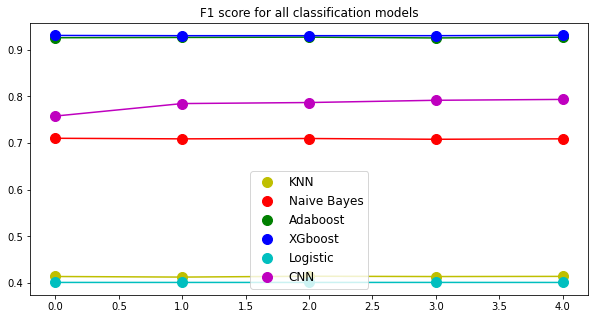

In [0]:
plot_metrics("F1 score for all classification models",f1_temp,"KNN","Naive Bayes","Adaboost","XGboost","Logistic","CNN")

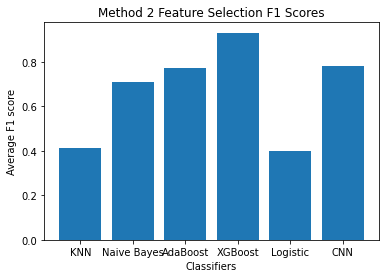

In [0]:
# data = average F1 score of each model:
%matplotlib inline
import matplotlib.pyplot as plt

data = [0.414,0.709,0.770,0.930,0.401,0.782]
plt.xlabel('Classifiers')
plt.ylabel('Average F1 score')
plt.title("Method 2 Feature Selection F1 Scores")
plt.bar(['KNN','Naive Bayes','AdaBoost','XGBoost','Logistic','CNN'], data)
plt.show()


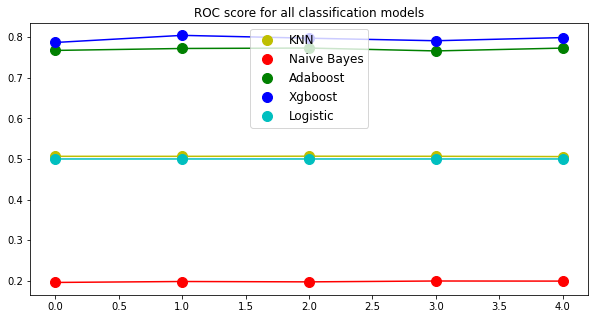

In [0]:
plot_metrics("Method 2 Feature Selection ROC Scores",roc,"KNN","Naive Bayes","Adaboost","XGboost","Logistic")

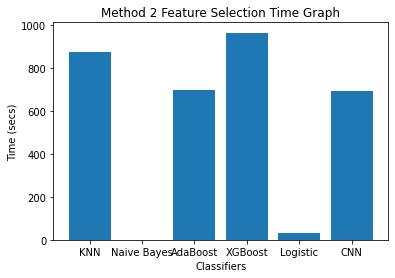

In [0]:
# data = average F1 score of each model:
%matplotlib inline
import matplotlib.pyplot as plt

time_data = [873.505,0.584,698.658,965.520,29.624,694.74]
plt.xlabel('Classifiers')
plt.ylabel('Time (secs)')
plt.title("Method 2 Feature Selection Time Graph")
plt.bar(['KNN','Naive Bayes','AdaBoost','XGBoost','Logistic','CNN'], time_data)
plt.show()